In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

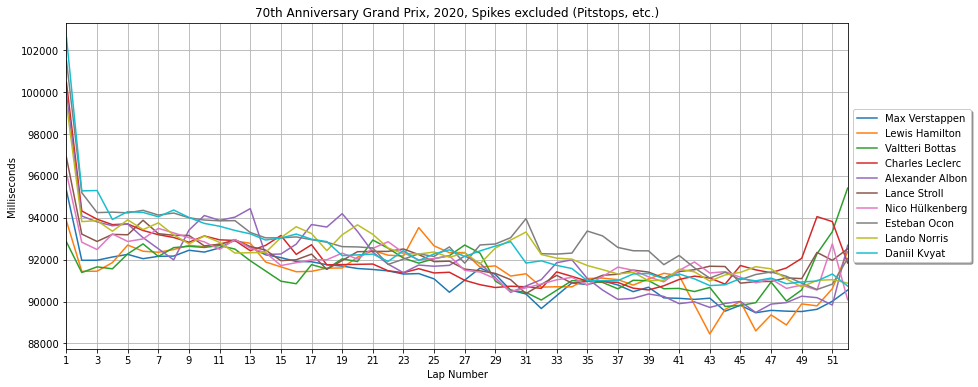

In [2]:
raceId = int(races_df[(races_df["year"] == 2020) & (races_df["round"] == 5)]["raceId"])
race_df = lap_times_df[lap_times_df["raceId"] == raceId]
pit_stop_df = pit_stops_df[pit_stops_df.raceId == raceId]

race_df = race_df.copy()

for driverId in pit_stop_df.driverId.drop_duplicates():
    for lap in pit_stop_df[pit_stop_df.driverId == driverId].lap:
        race_df.loc[(race_df.driverId == driverId) & (race_df.lap == lap + 1),'milliseconds'] = np.nan
        mean_value = race_df.loc[(race_df.driverId == driverId) & (race_df.lap.isin([lap, lap + 1, lap + 2]))].milliseconds.mean()
        race_df.loc[(race_df.driverId == driverId) & (race_df.lap == lap + 1),'milliseconds'] = mean_value

plt.figure(figsize=(14, 6))    

for driverId in results_df[results_df.raceId == raceId]["driverId"].iloc[:10]:
    driver_info = drivers_df[drivers_df["driverId"] == driverId]
    driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
    plt.plot(race_df[race_df.driverId == driverId].lap, 
             race_df[race_df.driverId == driverId].milliseconds, 
             label = driver_name.iloc[0])

plt.legend(loc='center left', fancybox=True, shadow=True, bbox_to_anchor=(1, 0.5))
plt.grid()

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())

race_name = races_df[races_df["raceId"] == int(raceId)]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == int(raceId)]["year"].iloc[0]
plt.title(str(race_name) + ', ' + str(race_year) + ', Spikes excluded (Pitstops, etc.)')
plt.xlabel('Lap Number')
plt.ylabel('Milliseconds')

plt.show()